#  Assignment 4: Robot Dynamics

This notebook completes the fourth task in the **Fundamentals of Robotics** series and includes:
- 🧠 Dynamic model derivation using the Euler–Lagrange method
- 🧮 Computation of M(q), C(q, q̇), and g(q) terms
- 📉 Torque plots during trapezoidal motion
- 🚗 Robot trajectory using dynamic profiles


> **Note:** Continues from Assignment 3. Motion profiles and trajectory functions are reused.


$$
  \text{Fundamentals of Robotics — Assignment 4} \\
  \text{Valeria Neganova — RO-1} \\
  \text{2025}
$$

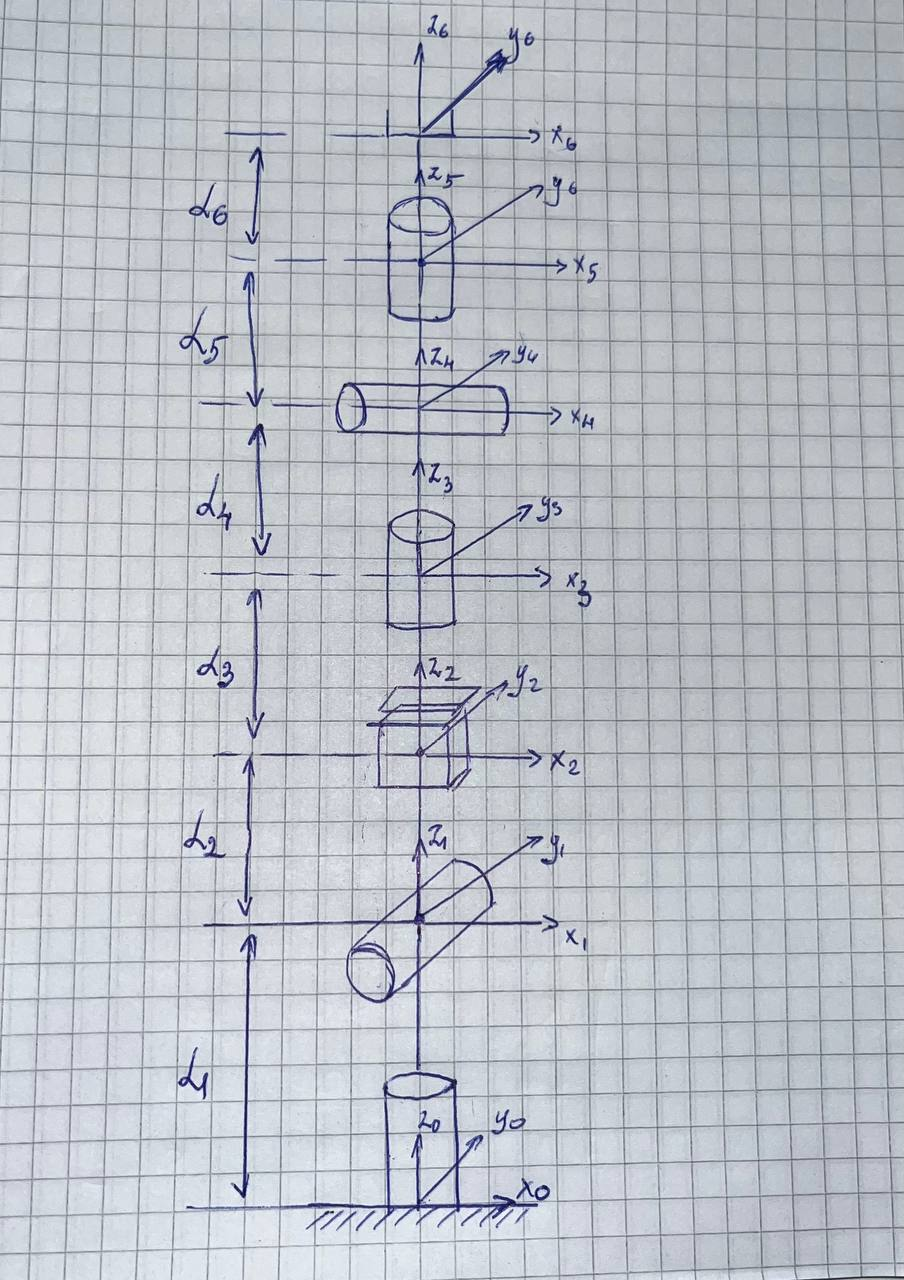

### Euler-Lagrange approach for  robot model


$$
M(q) \ddot{q} + C(q, \dot{q}) + g(q) = \tau
$$

Where:
- $q$ — vector of generalized coordinates (joint positions),
- $\dot{q}$ — vector of joint velocities,
- $\ddot{q}$ — vector of joint accelerations,
- $M(q)$ — inertia matrix (depends on configuration $q$),
- $C(q, \dot{q})$ — vector of Coriolis and centrifugal forces,
- $g(q)$ — vector of gravitational torques,
- $\tau$ — vector of actuator torques/forces.

Firstly I need to compute Inertia matrix :

$$
M(q) = \sum_{i=1}^{n} m_i \left(J_v^i\right)^\top J_v^i + \left(J_\omega^i\right)^\top R_i \tilde{I}_i R_i^\top J_\omega^i
$$



For computing the Jacobians $J_v^i$ and $J_\omega^i$, I need to determine the center of mass of each link.

Let's define centre of masses:
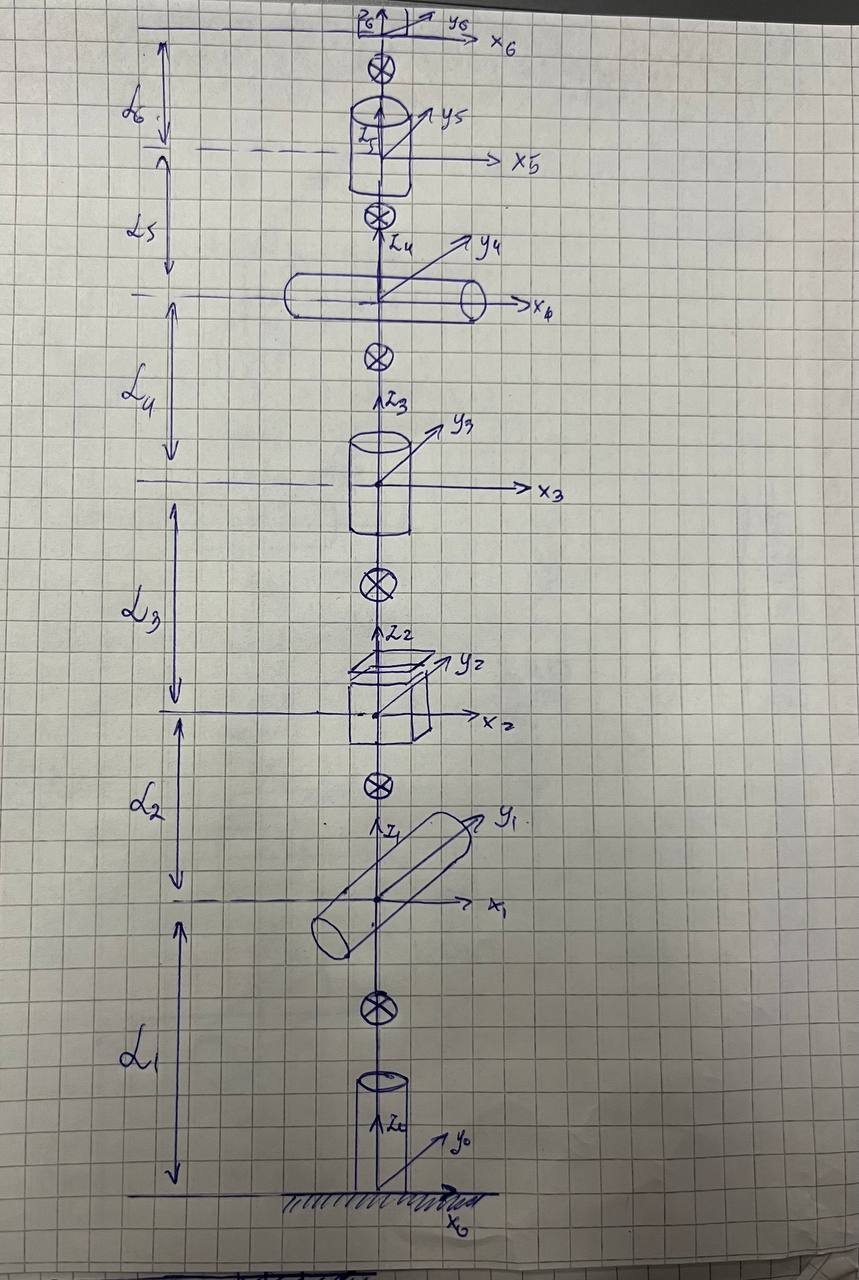


### Find Inertia Matrix, Coriolis matrix, Gravity vector




Let's define tensor of inertia:

- For revolution joint $$
\mathcal{I} =
\begin{bmatrix}
\frac{1}{12}m(3r^2 + h^2) & 0 & 0 \\
0 & \frac{1}{12}m(3r^2 + h^2) & 0 \\
0 & 0 & \frac{1}{2}mr^2
\end{bmatrix}
$$

Where $r_i = 1, h_i = 10, m_i = 2$

- For prizmatic joint
$$
\mathcal{I} =
\begin{bmatrix}
\frac{m}{12}(b^2 + c^2) & 0 & 0 \\
0 & \frac{m}{12}(a^2 + c^2) & 0 \\
0 & 0 & \frac{m}{12}(a^2 + b^2)
\end{bmatrix}
$$

Where $a = 2, b = 3, c = 4$

Now, let's compute

---


### Inertia Matrix $M(q)$

The total inertia matrix is computed as:

$$
\mathbf{M(q)} = \sum_{i=1}^{n} \left( m_i J_{v_i}^T J_{v_i} + J_{\omega_i}^T \mathcal{I}_i J_{\omega_i} \right)
$$

Where:  
- $J_{v_i}$ — linear velocity Jacobian of link $i$’s center of mass  
- $J_{\omega_i}$ — angular velocity Jacobian  
- $\mathcal{I}_i$ — inertia tensor of link $i$

---

###  Coriolis Matrix $C(q, \dot{q})$

The Christoffel symbol of the first kind:

$$
c_{ijk} = \frac{1}{2} \left( \frac{\partial M_{ij}}{\partial q_k} + \frac{\partial M_{ik}}{\partial q_j} - \frac{\partial M_{jk}}{\partial q_i} \right)
$$

The Coriolis matrix elements are:

$$
C_{ij} = \sum_{k=1}^{n} c_{ijk} \dot{q}_k
$$

To compute derivatives numerically:

$$
\frac{\partial M_{ij}}{\partial q_k} \approx \frac{M_{ij}(q_k + \delta) - M_{ij}(q_k - \delta)}{2\delta}
$$

---

### Matrix $N$: Consistency Check

To verify correctness:

$$
N_{ij} = \sum_{k=1}^{n} \left( \frac{\partial M_{ij}}{\partial q_k} \dot{q}_k \right) - 2C_{ij}
$$

Matrix $N$ should be skew-symmetric:  
$$
N = -N^T
$$

---

###  Gravity Vector $G(q)$

Gravity vector is computed from the Jacobians of the centers of mass:

$$
G_i(q) = -\sum_{k=1}^{n} \left( J_{v_i}^k \right)^T m_k \mathbf{g}_0
$$

Where:  
$$
\mathbf{g}_0 = \begin{bmatrix} 0 \\ 0 \\ -9.81 \end{bmatrix}
$$

---

### Full Dynamics Equation

Final dynamic model:

$$
\tau = \mathbf{M(q)} \ddot{q} + \mathbf{C(q, \dot{q})} \dot{q} + \mathbf{G(q)}
$$




In [ ]:
import sympy as sym

def Rx_sym(q):
    T = sym.Matrix([[1,         0,          0, 0],
                  [0, sym.cos(q), -sym.sin(q), 0],
                  [0, sym.sin(q),  sym.cos(q), 0],
                  [0,         0,          0, 1]])
    return T

def Ry_sym(q):
    T = sym.Matrix([[ sym.cos(q), 0, -sym.sin(q), 0],
                  [         0, 1,         0, 0],
                  [sym.sin(q), 0, sym.cos(q), 0],
                  [         0, 0,         0, 1]])
    return T

def Rz_sym(q):
    T = sym.Matrix([[sym.cos(q), -sym.sin(q), 0, 0],
                  [sym.sin(q),  sym.cos(q), 0, 0],
                  [        0,          0, 1, 0],
                  [        0,          0, 0, 1]])
    return T

def Tx_sym(x):
    T = sym.Matrix([[1, 0, 0, x],
                  [0, 1, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    return T

def Ty_sym(y):
    T = sym.Matrix([[1, 0, 0, 0],
                  [0, 1, 0, y],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    return T

def Tz_sym(z):
    T = sym.Matrix([[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, z],
                  [0, 0, 0, 1]])
    return T


def dRz_sym(q):
            return sp.Matrix([
                [-sp.sin(q), -sp.cos(q), 0, 0],
                [ sp.cos(q), -sp.sin(q), 0, 0],
                [0, 0, 0, 0],
                [0, 0, 0, 0]
            ])
def dRy_sym(q):
  return sp.Matrix([
    [-sp.sin(q), 0,  sp.cos(q), 0],
    [0, 0, 0, 0],
    [-sp.cos(q), 0, -sp.sin(q), 0],
    [0, 0, 0, 0]
 ])

def dRx_sym(q):
  return sp.Matrix([
    [0, 0, 0, 0],
    [0, -sp.sin(q), -sp.cos(q), 0],
    [0,  sp.cos(q), -sp.sin(q), 0],
    [0, 0, 0, 0]
  ])




In [ ]:
import math
import random
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

initial_position = []
final_position = []
first_pos = []
second_pos = []
third_pos = []
fourth_pos = []
J_matrix = []

class RobotArm:
    def __init__(self):

        self.L1, self.L2, self.L3 = 10, 10, 10
        self.L4, self.L5, self.L6 = 10, 10, 10
        self.d3 = 4

        self.theta1, self.theta2, self.theta3, self.theta4, self.theta5, self.theta6 = sp.symbols('theta1 theta2 theta3 theta4 theta5 theta6', real=True)

        self.T01 = sp.Matrix([
            [sp.cos(self.theta1), -sp.sin(self.theta1), 0, 0],
            [sp.sin(self.theta1),  sp.cos(self.theta1), 0, 0],
            [0,0,1, self.L1],
            [0,0,0, 1]
        ])

        self.T12 = sp.Matrix([
            [sp.cos(self.theta2), 0, -sp.sin(self.theta2), -self.L2 * sp.sin(self.theta2)],
            [0, 1, 0, 0],
            [sp.sin(self.theta2), 0, sp.cos(self.theta2), self.L2 * sp.cos(self.theta2)],
            [0, 0, 0, 1]
        ])

        self.T23 = sp.Matrix([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, self.d3 + self.L3],
            [0, 0, 0, 1]
        ])

        self.T34 = sp.Matrix([
            [sp.cos(self.theta4), -sp.sin(self.theta4), 0, 0],
            [sp.sin(self.theta4),  sp.cos(self.theta4), 0, 0],
            [0,0,1, self.L4],
            [0,0,0, 1]
        ])

        self.T45 = sp.Matrix([
            [1, 0, 0, 0],
            [0, sp.cos(self.theta5), -sp.sin(self.theta5), -self.L5 * sp.sin(self.theta5)],
            [0, sp.sin(self.theta5),  sp.cos(self.theta5), self.L5 * sp.cos(self.theta5)],
            [0, 0, 0, 1]
        ])

        self.T56 = sp.Matrix([
            [sp.cos(self.theta6), -sp.sin(self.theta6), 0, 0],
            [sp.sin(self.theta6),  sp.cos(self.theta6), 0, 0],
            [0,                   0,                  1, self.L6],
            [0, 0, 0, 1]
        ])


        self.T06_symbolic = sp.simplify(self.T01 * self.T12 * self.T23 * self.T34 * self.T45 * self.T56)


        self.current_joints = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

    def forward_kinematics(self, joints):

        self.current_joints = joints

        subs_dict = {
            self.theta1: joints[0],
            self.theta2: joints[1],
            self.theta3: joints[2],
            self.theta4: joints[3],
            self.theta5: joints[4],
            self.theta6: joints[5]
        }
        T06_num = self.T06_symbolic.evalf(subs=subs_dict)
        return np.array(T06_num.tolist(), dtype=float)

    def inverse_kinematics_all(self, T06_num):
      solutions = []

      p = T06_num[0:3, 3]
      z6 = T06_num[0:3, 2]


      L6_eff = 10.0
      Pc = p - L6_eff * z6
      Px, Py, Pz = Pc[0], Pc[1], Pc[2]

      L1, L2 = self.L1, self.L2
      d3, L3 = self.d3, self.L3

      R = 30
      cos_t2 = (Pz - L1) / 30
      if abs(cos_t2) > 1.0:
          return solutions
      sin_t2_val = np.sqrt(1 - cos_t2**2)

      theta2_candidates = [np.arctan2(+sin_t2_val, cos_t2),
                            np.arctan2(-sin_t2_val, cos_t2)]

      for theta2 in theta2_candidates:
          sin_t2 = np.sin(theta2)
          if abs(sin_t2) < 1e-6:
              continue

          theta1 = np.arctan2(-Py/(R*sin_t2), -Px/(R*sin_t2))

          theta3 = self.d3

          R03 = np.array([
              [np.cos(theta1)*np.cos(theta2), -np.sin(theta1), -np.cos(theta1)*np.sin(theta2)],
              [np.sin(theta1)*np.cos(theta2),  np.cos(theta1), -np.sin(theta1)*np.sin(theta2)],
              [np.sin(theta2),                 0,              np.cos(theta2)]
          ])
          R06 = T06_num[:3, :3]
          R03_inv = np.linalg.inv(R03)
          R36 = R03_inv @ R06

          r13 = R36[0,2]
          r12 = R36[0,1]
          r22 = R36[1,1]
          r23 = R36[1,2]
          r33 = R36[2,2]
          r31 = R36[2,0]
          r32 = R36[2,1]



          # singular case consider
          if abs(r33 - 1) < 1e-5 or abs(r33 + 1) < 1e-5:
            if r33 > 0:
                theta4 = np.arctan2(r12, r22)
                theta6 = 0.0
            else:
                theta6 = -np.pi * np.arctan2(r12, r22)
                theta4 = 0.0
            theta5 = 0.0
            sol = (theta1, theta2, theta3, theta4, theta5, theta6)
            solutions.append(sol)
          else:
              cos_t5 = r33
              if abs(cos_t5) > 1:
                  cos_t5 = np.sign(cos_t5)
              sin_t5_val = np.sqrt(max(0, 1 - cos_t5**2))
              theta5_candidates = [np.arctan2(+sin_t5_val, cos_t5),
                                  np.arctan2(-sin_t5_val, cos_t5)]

              for theta5 in theta5_candidates:
                  if abs(np.sin(theta5)) < 1e-6:
                      theta4 = np.arctan2(r12, r22)
                      theta6 = 0.0
                  else:
                      sin_t5 = np.sin(theta5)
                      theta6 = np.arctan2(r31/sin_t5, r32/sin_t5)
                      theta4 = np.arctan2(r13/sin_t5, -r23/sin_t5)
                  sol = (theta1, theta2, theta3, theta4, theta5, theta6)
                  solutions.append(sol)

      return solutions




    def rad2deg(x):
        return round(math.degrees(x), 0)





    def get_all_frames(self, joints):
        subs_dict = {
            self.theta1: joints[0],
            self.theta2: joints[1],
            self.theta3: joints[2],
            self.theta4: joints[3],
            self.theta5: joints[4],
            self.theta6: joints[5]
        }

        T01_num = self.T01.evalf(subs=subs_dict)
        T12_num = self.T12.evalf(subs=subs_dict)
        T23_num = self.T23.evalf(subs=subs_dict)
        T34_num = self.T34.evalf(subs=subs_dict)
        T45_num = self.T45.evalf(subs=subs_dict)
        T56_num = self.T56.evalf(subs=subs_dict)


        T01_num = np.array(T01_num.tolist(), dtype=float)
        T12_num = np.array(T12_num.tolist(), dtype=float)
        T23_num = np.array(T23_num.tolist(), dtype=float)
        T34_num = np.array(T34_num.tolist(), dtype=float)
        T45_num = np.array(T45_num.tolist(), dtype=float)
        T56_num = np.array(T56_num.tolist(), dtype=float)

        T0_0 = np.eye(4)
        T0_1 = T0_0 @ T01_num

        T0_2 = T0_1 @ T12_num
        T0_3 = T0_2 @ T23_num
        T0_4 = T0_3 @ T34_num
        T0_5 = T0_4 @ T45_num
        T0_6 = T0_5 @ T56_num

        return [T0_0, T0_1, T0_2, T0_3, T0_4, T0_5, T0_6]

    def plot_robot(self, joints, ax=None, show_frames=True):

        frames = self.get_all_frames(joints)


        if ax is None:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            new_figure = True
        else:
            new_figure = False


        points = []
        for Ti in frames:
            px, py, pz = Ti[0, 3], Ti[1, 3], Ti[2, 3]
            points.append([px, py, pz])


        xs = [p[0] for p in points]
        ys = [p[1] for p in points]
        zs = [p[2] for p in points]
        ax.plot(xs, ys, zs, 'o-', color='blue', linewidth=2, markersize=5)


        if show_frames:
            for Ti in frames:
                self._draw_frame(ax, Ti, scale=3.0)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_xlim([-20, 30])
        ax.set_ylim([-20, 30])
        ax.set_zlim([0, 40])


        if new_figure:
            plt.show()


    def _draw_frame(self, ax, T, scale=2.0):
      px, py, pz = T[0, 3], T[1, 3], T[2, 3]
      ux = T[0:3, 0]
      uy = T[0:3, 1]
      uz = T[0:3, 2]
      ax.quiver(px, py, pz, ux[0], ux[1], ux[2], color='r', length=scale)
      ax.quiver(px, py, pz, uy[0], uy[1], uy[2], color='g', length=scale)
      ax.quiver(px, py, pz, uz[0], uz[1], uz[2], color='b', length=scale)


    def compute_com_jacobians_numeric(self, joints):
      frames = self.get_all_frames(joints)
      J_com_list = []
      link_lengths = [self.L1, self.L2, self.L3, self.L4, self.L5, self.L6]
      joint_axes = ['z', 'y', 'z', 'z', 'x', 'z']

      axis_index_map = {
          'x': 0,
          'y': 1,
          'z': 2
      }

      for i in range(6):
          axis_name = joint_axes[i]
          axis_idx = axis_index_map[axis_name]

          o_prev = np.array(frames[i][0:3, 3]).astype(float).flatten()
          z_prev = np.array(frames[i][0:3, axis_idx]).astype(float).flatten()
          L_i = link_lengths[i]

          p_mi = o_prev + 0.5 * L_i * z_prev

          J = np.zeros((6, 6))

          for j in range(6):
              if j > i:
                  continue

              axis_name_j = joint_axes[j]
              axis_idx_j = axis_index_map[axis_name_j]

              z_j = np.array(frames[j][0:3, axis_idx_j]).astype(float).flatten()
              p_j = np.array(frames[j][0:3, 3]).astype(float).flatten()

              if j == 2:
                  J[0:3, j] = z_j
                  J[3:6, j] = np.zeros(3)
              else:
                  J[0:3, j] = np.cross(z_j, p_mi - p_j)
                  J[3:6, j] = z_j

          J_com_list.append(np.round(J, 2))

      return J_com_list

    def compute_inertia_matrix(self, joints):
      self.current_joints = joints
      J_com_all = self.compute_com_jacobians_numeric(joints)

      m = 2.0
      r = 1.0
      h = 10.0
      a, b, c = 2.0, 3.0, 4.0
      count = 0

      I_cylinder = np.diag([
          (1/12) * m * (3 * r**2 + h**2),
          (1/12) * m * (3 * r**2 + h**2),
          (1/2) * m * r**2
      ])

      I_block = np.diag([
        (1/12) * m * (b**2 + c**2),
        (1/12) * m * (a**2 + c**2),
        (1/12) * m * (a**2 + b**2)
      ])

      M = np.zeros((6, 6))

      for J in J_com_all:
          J_v = J[0:3, :]
          J_w = J[3:6, :]
          if (count != 2):
            M += m * J_v.T @ J_v + J_w.T @ I_cylinder @ J_w
          else:
            M += m * J_v.T @ J_v + J_w.T @ I_block @ J_w
          count += 1
      return M



    def compute_coriolis_matrix(self, q, dq, delta):
      n = len(q)
      C = np.zeros((n, n))
      N = np.zeros((n, n))

      for i in range(n):
          for j in range(n):
              n_i_j_k = 0.0
              for k in range(n):
                  q_plus_k = list(q)
                  q_minus_k = list(q)
                  q_plus_k[k] += delta
                  q_minus_k[k] -= delta
                  M_plus_k = self.compute_inertia_matrix(q_plus_k)
                  M_minus_k = self.compute_inertia_matrix(q_minus_k)
                  dM_ij_dqk = (M_plus_k[i][j] - M_minus_k[i][j]) / (2 * delta)

                  q_plus_j = list(q)
                  q_minus_j = list(q)
                  q_plus_j[j] += delta
                  q_minus_j[j] -= delta
                  M_plus_j = self.compute_inertia_matrix(q_plus_j)
                  M_minus_j = self.compute_inertia_matrix(q_minus_j)
                  dM_ik_dqj = (M_plus_j[i][k] - M_minus_j[i][k]) / (2 * delta)

                  q_plus_i = list(q)
                  q_minus_i = list(q)
                  q_plus_i[i] += delta
                  q_minus_i[i] -= delta
                  M_plus_i = self.compute_inertia_matrix(q_plus_i)
                  M_minus_i = self.compute_inertia_matrix(q_minus_i)
                  dM_jk_dqi = (M_plus_i[j][k] - M_minus_i[j][k]) / (2 * delta)

                  c_ijk = 0.5 * (dM_ij_dqk + dM_ik_dqj - dM_jk_dqi)
                  C[i][j] += c_ijk * dq[k]
                  n_i_j_k += dM_ij_dqk * dq[k]

              N[i][j] = n_i_j_k - 2 * C[i][j]

      return np.round(C, 5), np.round(N, 5)

    def compute_gravity_vector(self):
      joints = self.current_joints
      m = 2
      g0 = np.array([[0], [0], [-9.81]])

      J_all = self.compute_com_jacobians_numeric(joints)
      G = np.zeros((6, 1))

      for  J in J_all:
        J_v = J[0:3, :]
        G -= m * J_v.T @ g0


      return np.round(G,5)


    def jacobian_numeric(self):
        q1, q2, d3, q4, q5, q6 = self.current_joints
        L1, L2, L3, L4, L5, L6 = self.L1, self.L2, self.L3, self.L4, self.L5, self.L6



        H = Rz_sym(q1) @ Tz_sym(L1) @ Ry_sym(q2) @ Tz_sym(L2) @ Tz_sym(d3 + L3) @ Rz_sym(q4) @ Tz_sym(L4) @ \
            Rx_sym(q5) @ Tz_sym(L5) @ Rz_sym(q6) @ Tz_sym(L6)

        R = H[:3, :3]
        R_inv = R.T
        H_ee = sp.eye(4)
        H_ee[:3, :3] = R_inv


        H_ = dRz_sym(q1) @ Tz_sym(L1) @ Ry_sym(q2) @ Tz_sym(L2) @ Tz_sym(d3 + L3) @ Rz_sym(q4) @ Tz_sym(L4) @ \
             Rx_sym(q5) @ Tz_sym(L5) @ Rz_sym(q6) @ Tz_sym(L6) @ H_ee
        J1 = sp.Matrix([H_[0,3], H_[1,3], H_[2,3], H_[2,1], H_[0,2], H_[1,0]])


        H_ = Rz_sym(q1) @ Tz_sym(L1) @ dRy_sym(q2) @ Tz_sym(L2) @ Tz_sym(d3 + L3) @ Rz_sym(q4) @ Tz_sym(L4) @ \
             Rx_sym(q5) @ Tz_sym(L5) @ Rz_sym(q6) @ Tz_sym(L6) @ H_ee
        J2 = sp.Matrix([H_[0,3], H_[1,3], H_[2,3], H_[2,1], H_[0,2], H_[1,0]])


        H_ = Rz_sym(q1) @ Tz_sym(L1) @ Ry_sym(q2) @ Tz_sym(L2) @ sp.Matrix([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 0, 1],
            [0, 0, 0, 0]
        ]) @ Rz_sym(q4) @ Tz_sym(L4) @ Rx_sym(q5) @ Tz_sym(L5) @ Rz_sym(q6) @ Tz_sym(L6) @ H_ee
        J3 = sp.Matrix([H_[0,3], H_[1,3], H_[2,3], 0, 0, 0])


        H_ = Rz_sym(q1) @ Tz_sym(L1) @ Ry_sym(q2) @ Tz_sym(L2) @ Tz_sym(d3 + L3) @ dRz_sym(q4) @ Tz_sym(L4) @ \
             Rx_sym(q5) @ Tz_sym(L5) @ Rz_sym(q6) @ Tz_sym(L6) @ H_ee
        J4 = sp.Matrix([H_[0,3], H_[1,3], H_[2,3], H_[2,1], H_[0,2], H_[1,0]])


        H_ = Rz_sym(q1) @ Tz_sym(L1) @ Ry_sym(q2) @ Tz_sym(L2) @ Tz_sym(d3 + L3) @ Rz_sym(q4) @ Tz_sym(L4) @ \
             dRx_sym(q5) @ Tz_sym(L5) @ Rz_sym(q6) @ Tz_sym(L6) @ H_ee
        J5 = sp.Matrix([H_[0,3], H_[1,3], H_[2,3], H_[2,1], H_[0,2], H_[1,0]])

        H_ = Rz_sym(q1) @ Tz_sym(L1) @ Ry_sym(q2) @ Tz_sym(L2) @ Tz_sym(d3 + L3) @ Rz_sym(q4) @ Tz_sym(L4) @ \
             Rx_sym(q5) @ Tz_sym(L5) @ dRz_sym(q6) @ Tz_sym(L6) @ H_ee
        J6 = sp.Matrix([H_[0,3], H_[1,3], H_[2,3], H_[2,1], H_[0,2], H_[1,0]])


        J = sp.Matrix.hstack(J1, J2, J3, J4, J5, J6)
        J_num = np.array(J.evalf(), dtype=float)
        return J_num.round(2)




def main():
    global initial_position, final_position, first_pos, second_pos, third_pos, fourth_pos
    random.seed(0)
    n_tests = 4
    robot = RobotArm()
    success_count = 0
    final_valid_solution = None

    for test in range(n_tests):

        t1_in = math.radians(random.uniform(-180, 180))
        t2_in = math.radians(random.uniform(-180, 180))
        t3_in = 0.0
        t4_in = math.radians(random.uniform(-180, 180))
        t5_in = math.radians(random.uniform(-180, 180))
        t6_in = math.radians(random.uniform(-180, 180))

        input_angles = [t1_in, t2_in, t3_in, t4_in, t5_in, t6_in]
        T06_in = robot.forward_kinematics(input_angles)
        solutions = robot.inverse_kinematics_all(T06_in)

        valid_solutions = []

        for sol in solutions:
            T06_sol = robot.forward_kinematics(sol)
            diff = np.max(np.abs(T06_sol - T06_in))
            if diff < 0.01:
                valid_solutions.append(sol)
                success_count += 1

        if valid_solutions:
            differences = [np.linalg.norm(np.array(sol) - np.array(input_angles)) for sol in valid_solutions]
            min_index = np.argmin(differences)
            final_valid_solution = valid_solutions[min_index]
            robot.current_joints = final_valid_solution
            if (success_count/4 == 1):
              initial_position = [np.round(t1_in,2).tolist(), np.round(t2_in,2).tolist(), np.round(0,2).tolist(), np.round(t4_in,2).tolist(), np.round(t5_in,2).tolist(), np.round(t6_in,2).tolist()]
              first_pos = initial_position
              print("Initial position", initial_position)
            if (success_count/4 == 2):
              print("Final position", np.round(np.array(final_valid_solution), 2).tolist())

              second_pos = final_position


            if (success_count/4 == 3):
              third_pos = np.round(np.array(final_valid_solution), 2).tolist()
            if (success_count/4 == 4):
              final_position = np.round(np.array(final_valid_solution), 2).tolist()
              fourth_pos = np.round(np.array(final_valid_solution), 2).tolist()






    joints = robot.current_joints
    J_com_all = robot.compute_com_jacobians_numeric(joints)
    J_matrix = np.round(np.array(J_com_all), 2).tolist()
    np.set_printoptions(precision=2, suppress=True)

    for idx, J in enumerate(J_com_all):
      J_com_all[idx] = np.round(np.array(J), 2).tolist()
      print(f"Jacobian for CoM of link {idx+1}:\n", J)


    M = robot.compute_inertia_matrix(robot.current_joints)
    print("\nInertia matrix:\n", M)

    q = robot.current_joints
    dq = [0.1, 0.2, 0.0, 0.05, -0.1, 0.1]
    C, N = robot.compute_coriolis_matrix(q, dq, 1e-3)
    print("Coriolis matrix:\n", C)
    print("N matrix:\n", N)

    G = robot.compute_gravity_vector()
    print("Gravity vector:\n", G)









if __name__ == '__main__':
    main()


Jacobian for CoM of link 1:
 [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
Jacobian for CoM of link 2:
 [[-2.36  0.    0.    0.    0.    0.  ]
 [-4.41  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.88  0.    0.    0.    0.  ]
 [ 0.    0.47  0.    0.    0.    0.  ]
 [ 1.    0.    0.    0.    0.    0.  ]]
Jacobian for CoM of link 3:
 [[ -7.29  -5.91   0.26   0.     0.     0.  ]
 [  3.91 -11.03   0.49   0.     0.     0.  ]
 [  0.    -8.27  -0.83   0.     0.     0.  ]
 [  0.    -0.88   0.     0.     0.     0.  ]
 [  0.     0.47   0.     0.     0.     0.  ]
 [  1.     0.     0.     0.     0.     0.  ]]
Jacobian for CoM of link 4:
 [[-14.1  -11.42   0.26   0.     0.     0.  ]
 [  7.55 -21.33   0.49   0.     0.     0.  ]
 [  0.   -16.    -0.83   0.     0.     0.  ]
 [  0.    -0.88   0.     0.26   0.     0.  ]
 [  0.     0.47   0.     0.49   0.     0.  ]
 [  1.     0.     0.    -0

So we obtain the inertia matrix
$$
M =
\begin{bmatrix}
3193.99 & -468.55 & 12.02 & -836.07 & 159.76 & 0.37 \\
-468.55 & 6738.35 & 22.13 & 672.65 & 177.34 & -14.79 \\
12.02 & 22.13 & 7.97 & -0.15 & 29.75 & 0 \\
-836.07 & 672.65 & -0.15 & 511.5 & 12.93 & 2.87 \\
159.76 & 177.34 & 29.75 & 12.93 & 476.85 & -2.89 \\
0.37 & -14.79 & 0 & 2.87 & -2.89 & 14.87
\end{bmatrix}
$$

As we can see, the matrix is symmetric, which confirms the correctness of the calculation

And Coriolis matrix
$$
C =
\begin{bmatrix}
635.75 & 433.86 & 0.39 & -117.90 & -8.13 & -3.82 \\
-336.59 & -88.44 & -1.73 & 79.32 & 114.46 & 0.00 \\
-7.07 & 43.85 & 0.00 & 1.60 & 0.13 & 0.00 \\
108.47 & -100.82 & 4.05 & -9.96 & 94.74 & 4.05 \\
44.73 & -202.01 & -1.05 & -96.83 & -6.51 & -1.71 \\
4.07 & 0.00 & 0.00 & -4.26 & -2.12 & 0.09
\end{bmatrix}
$$




To verify correctness, define matrix N by:

$$
n_{ij} = \dot{b}_{ij} - 2c_{ij}
$$

If matrix N is skew-symmetric (i.e., $ N = -N^T $), the Coriolis matrix computation is consistent

$$
N =
\begin{bmatrix}
0.00 & -770.45 & -7.46 & 226.38 & 52.86 & 7.90 \\
770.45 & 0.00 & 45.58 & -180.14 & -316.47 & 0.00 \\
7.46 & -45.58 & 0.00 & 2.44 & -1.18 & 0.00 \\
-226.38 & 180.14 & -2.44 & 0.00 & -191.57 & -8.31 \\
-52.86 & 316.47 & 1.18 & 191.57 & 0.00 & -0.42 \\
-7.90 & 0.00 & 0.00 & 8.31 & 0.42 & 0.00
\end{bmatrix}
$$

As we can see, the matrix is scew-symmetric, which confirms the correctness of the calculation


 Gravity Vector

$$
G(q) =
\begin{bmatrix}
0 \\
-1383.21 \\
-65.14 \\
-114.38 \\
-234.46 \\
0
\end{bmatrix}
$$


Final solution:


$$
\boldsymbol{\tau}_{\text{tot}} =
\begin{bmatrix}
3193.99 & -468.55 & 12.02 & -836.07 & 159.76 & 0.37 \\
-468.55 & 6738.35 & 22.13 & 672.65 & 177.34 & -14.79 \\
12.02 & 22.13 & 7.97 & -0.15 & 29.75 & 0 \\
-836.07 & 672.65 & -0.15 & 511.5 & 12.93 & 2.87 \\
159.76 & 177.34 & 29.75 & 12.93 & 476.85 & -2.89 \\
0.37 & -14.79 & 0 & 2.87 & -2.89 & 14.87
\end{bmatrix}
\cdot
\begin{bmatrix}
\ddot{q}_1 \\
\ddot{q}_2 \\
\ddot{q}_3 \\
\ddot{q}_4 \\
\ddot{q}_5 \\
\ddot{q}_6
\end{bmatrix}
+
\begin{bmatrix}
635.75 & 433.86 & 0.39 & -117.90 & -8.13 & -3.82 \\
-336.59 & -88.44 & -1.73 & 79.32 & 114.46 & 0.00 \\
-7.07 & 43.85 & 0.00 & 1.60 & 0.13 & 0.00 \\
108.47 & -100.82 & 4.05 & -9.96 & 94.74 & 4.05 \\
44.73 & -202.01 & -1.05 & -96.83 & -6.51 & -1.71 \\
4.07 & 0.00 & 0.00 & -4.26 & -2.12 & 0.09
\end{bmatrix}
\cdot
\begin{bmatrix}
\dot{q}_1 \\
\dot{q}_2 \\
\dot{q}_3 \\
\dot{q}_4 \\
\dot{q}_5 \\
\dot{q}_6
\end{bmatrix}
+
\begin{bmatrix}
0 \\
-1383.21 \\
-65.14 \\
-114.38 \\
-234.46 \\
0
\end{bmatrix}
$$

### Drive the robot joints between $[0, π]$ using trapezoidal profile

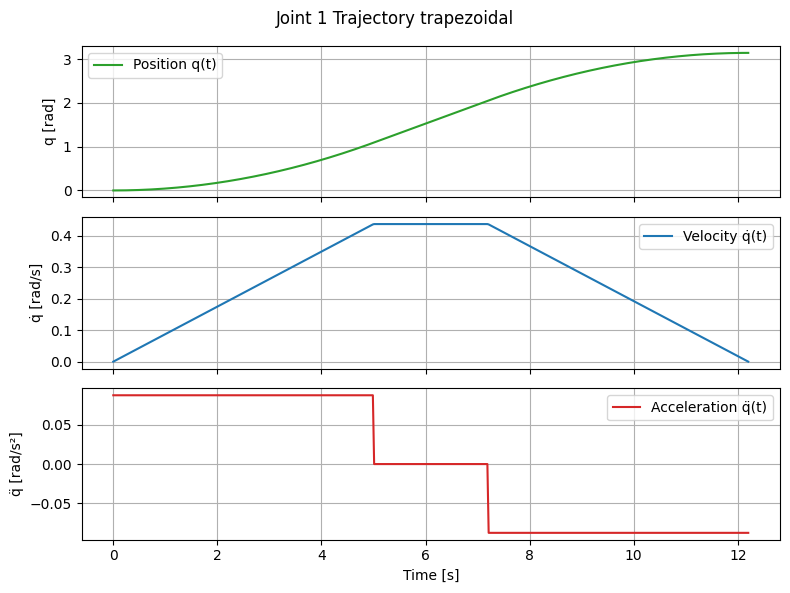

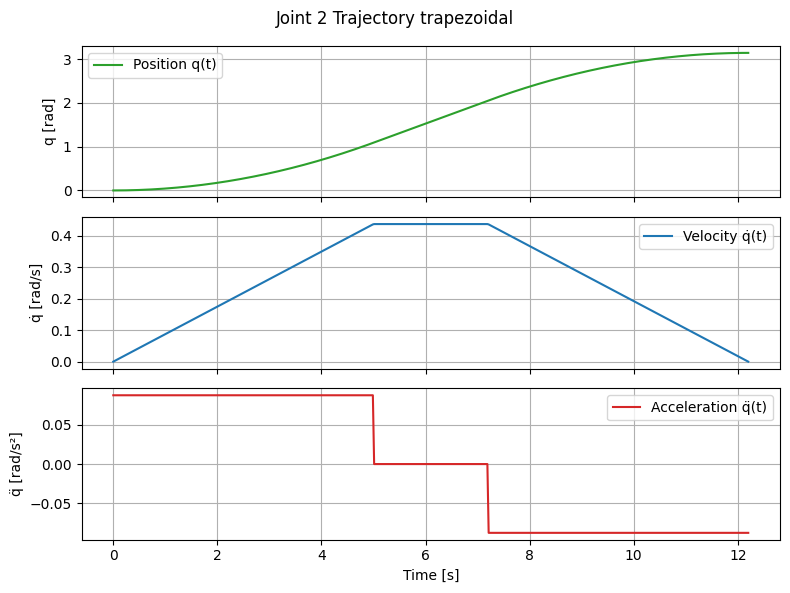

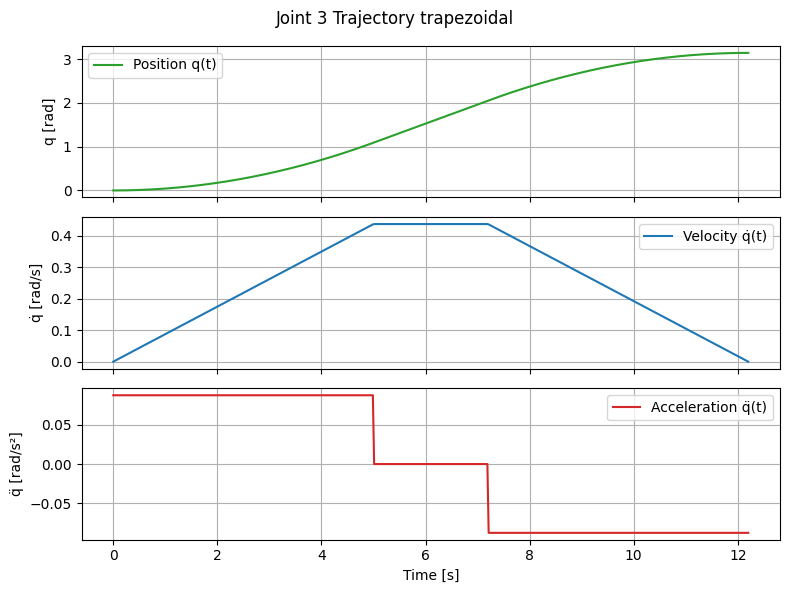

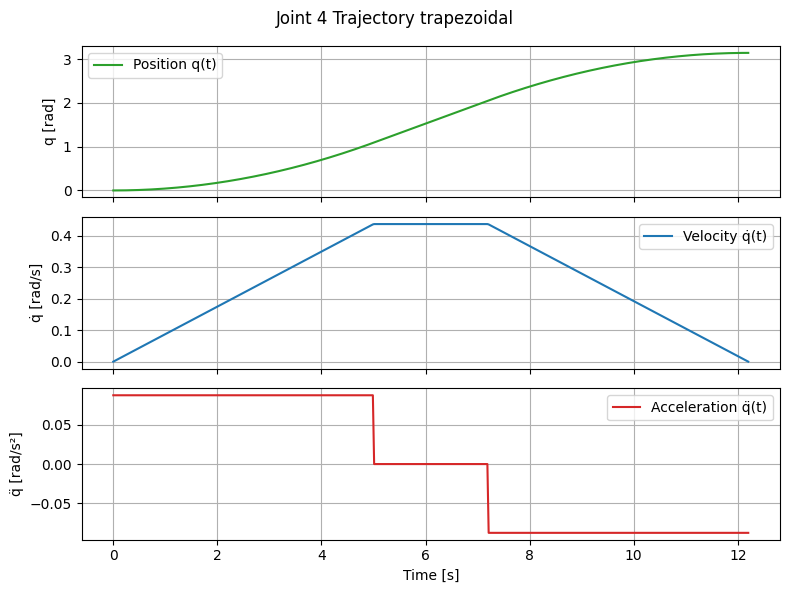

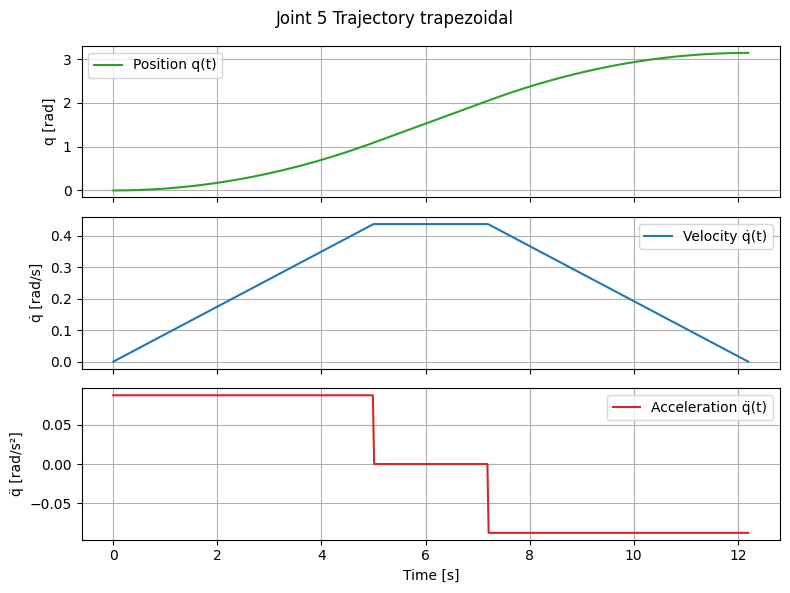

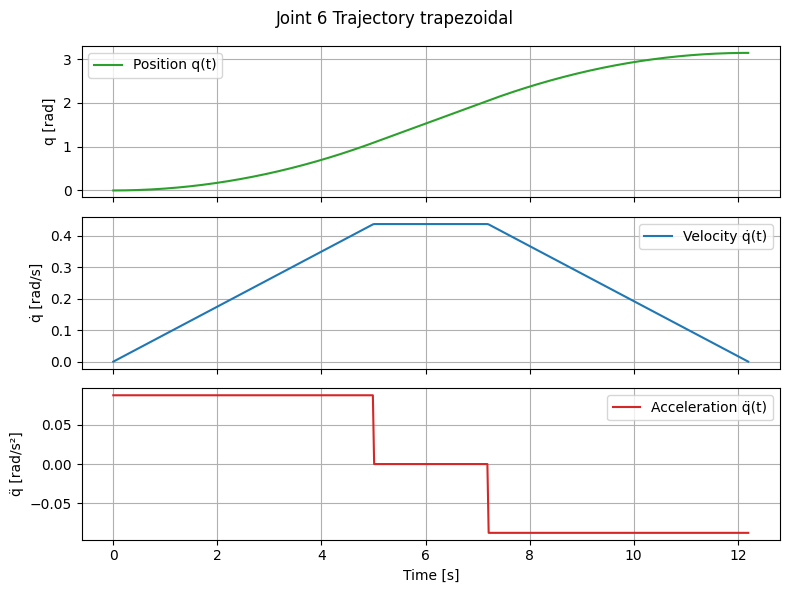

In [ ]:
q_dot_max = np.deg2rad(25)
q_ddot_max = np.deg2rad(5)

initial_position = 0
final_position = np.pi

for joint_idx in range(6):
    q0 = initial_position
    qf = final_position
    dq = abs(qf - q0)
    sign = np.sign(qf - q0)

    v_test = np.sqrt(q_ddot_max * dq)
    tb = q_dot_max / q_ddot_max
    tf = dq / q_dot_max + tb



    t = np.linspace(0, tf, 500)
    q = np.zeros_like(t)
    qd = np.zeros_like(t)
    qdd = np.zeros_like(t)

    for i, ti in enumerate(t):

      if ti <= tb:

        q[i] = q0 + 0.5 * q_ddot_max * ti**2 * sign
        qd[i] = q_ddot_max * ti * sign
        qdd[i] = q_ddot_max * sign
      elif ti <= tf - tb:
         q[i] = q0 + 0.5 * q_ddot_max * tb**2 * sign + q_dot_max * (ti - tb) * sign
         qd[i] = q_dot_max * sign
         qdd[i] = 0
      else:
         q[i] = qf - 0.5 * q_ddot_max * (tf - ti)**2 * sign
         qd[i] = q_ddot_max * (tf - ti) * sign
         qdd[i] = -q_ddot_max * sign

    fig, axs = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
    fig.suptitle(f"Joint {joint_idx+1} Trajectory trapezoidal")

    axs[0].plot(t, q, label='Position q(t)', color='tab:green')
    axs[0].set_ylabel("q [rad]")
    axs[0].grid(True)
    axs[0].legend()

    axs[1].plot(t, qd, label='Velocity q̇(t)', color='tab:blue')
    axs[1].set_ylabel("q̇ [rad/s]")
    axs[1].grid(True)
    axs[1].legend()

    axs[2].plot(t, qdd, label='Acceleration q̈(t)', color='tab:red')
    axs[2].set_ylabel("q̈ [rad/s²]")
    axs[2].set_xlabel("Time [s]")
    axs[2].grid(True)
    axs[2].legend()

    plt.tight_layout()
    plt.show()


### Plot torques


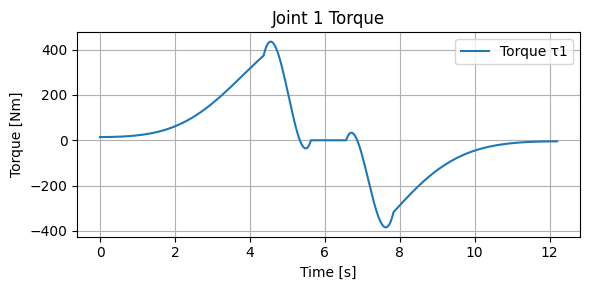

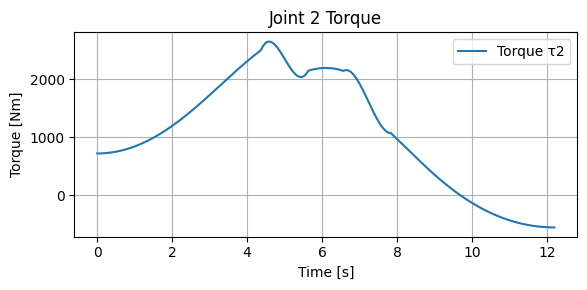

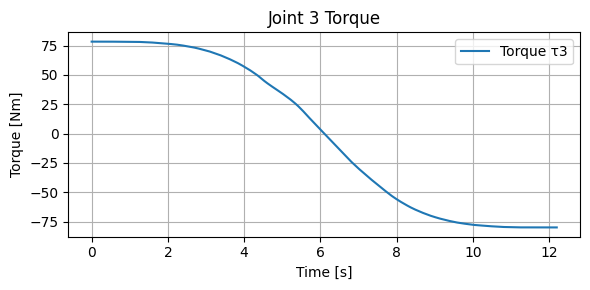

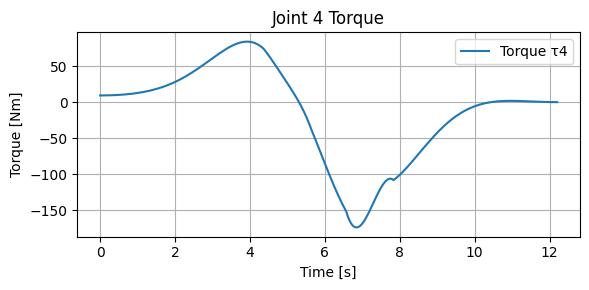

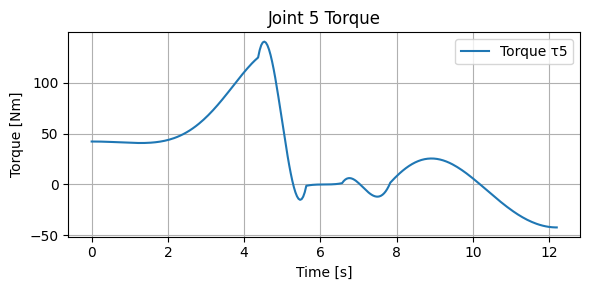

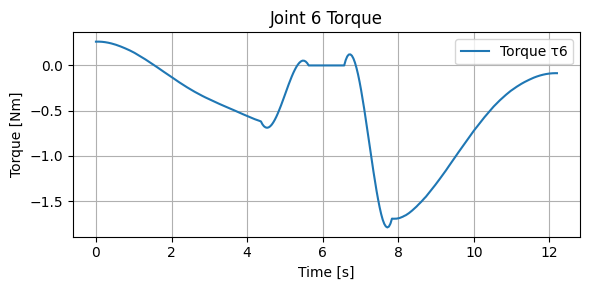

In [ ]:

from scipy.signal import savgol_filter

robot = RobotArm()



q0 = 0.0
qf = np.pi
dq = qf - q0
tb = q_dot_max / q_ddot_max
tf = dq / q_dot_max + tb

N = 300
t = np.linspace(0, tf, N)

q_vals = np.zeros(N)
qd_vals = np.zeros(N)
qdd_vals = np.zeros(N)

for i, ti in enumerate(t):
    if ti <= tb:
        q_vals[i] = q0 + 0.5 * q_ddot_max * ti**2
        qd_vals[i] = q_ddot_max * ti
        qdd_vals[i] = q_ddot_max
    elif ti <= tf - tb:
        q_vals[i] = q0 + 0.5 * q_ddot_max * tb**2 + q_dot_max * (ti - tb)
        qd_vals[i] = q_dot_max
        qdd_vals[i] = 0
    else:
        q_vals[i] = qf - 0.5 * q_ddot_max * (tf - ti)**2
        qd_vals[i] = q_ddot_max * (tf - ti)
        qdd_vals[i] = -q_ddot_max

torques = np.zeros((N, 6))

for i in range(N):
    q = [q_vals[i]] * 6
    qd = [qd_vals[i]] * 6
    qdd = [qdd_vals[i]] * 6

    robot.current_joints = q
    M = robot.compute_inertia_matrix(q)
    G = robot.compute_gravity_vector().flatten()

    torques[i] = M @ qdd + G

for j in range(6):
    plt.figure(figsize=(6, 3))
    tau_smooth = savgol_filter(torques[:, j], 31, 3)
    plt.plot(t, tau_smooth, label=f'Torque τ{j+1}')
    plt.title(f'Joint {j+1} Torque')
    plt.xlabel("Time [s]")
    plt.ylabel("Torque [Nm]")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
